In [15]:
import rootutils
import os
current_dir = os.getcwd()

# Find the project root directory based on your project's structure
project_root = os.path.abspath(os.path.join(current_dir, '..'))

rootutils.setup_root(project_root, indicator=".project-root", pythonpath=True)
from torchdrug.data.protein import Protein
from torchdrug import datasets, transforms


In [16]:
p = Protein.from_pdb("/scratch/ssd004/scratch/benjami/dyMEAN/all_data/pdb/5hi4_2_ag.pdb", atom_feature=None, bond_feature=None)

truncuate_transform = transforms.TruncateProtein(max_length=350, random=False)
protein_view_transform = transforms.ProteinView(view='residue')
transform = transforms.Compose([truncuate_transform, protein_view_transform])

In [17]:
p.residue_number

tensor([ 36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,
         50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
         64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
         92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 108,
        109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122,
        123, 124, 125, 126, 127, 128, 129])

In [18]:
# p.subresidue(p.resi == 1)
p2 = p.subresidue(p.residue_number > 100)
p2.connected_component_id

tensor([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1])

In [19]:
protein = transform(item = {"graph": p, 'kir':2})
protein2 = transform(item = {"graph": p2, 'kir':2})

In [20]:
from torchdrug import layers, data
from torchdrug.layers import geometry

graph_construction_model = layers.GraphConstruction(node_layers=[geometry.AlphaCarbonNode()], 
                                                    edge_layers=[geometry.SpatialEdge(radius=10.0, min_distance=5),
                                                                 geometry.KNNEdge(k=10, min_distance=5),
                                                                 geometry.SequentialEdge(max_distance=2)],
                                                    edge_feature="gearnet")
_protein = data.Protein.pack([protein['graph'], protein2['graph']])
protein_ = graph_construction_model(_protein)

In [26]:
print(protein['graph'].to_sequence())
print(protein2['graph'].to_sequence())
protein_[0].edge_list.t()

NPKRSSDYYNRSTSPWNLHRNEDPERYPSVIWEAKCRHLGCINADGNVDYHMNSVPIQQEILVLRREPPNSFRLEKILVSVGCTCVTPIVH
REPP.NSFRLEKILVSVGCTCVTPIVH


tensor([[63, 65, 66,  ..., 84, 40, 81],
        [69, 72, 72,  ..., 54, 54, 54],
        [ 1,  1,  1,  ...,  0,  0,  0]])

In [42]:
import torch
import torchdrug
from torchdrug import data
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline


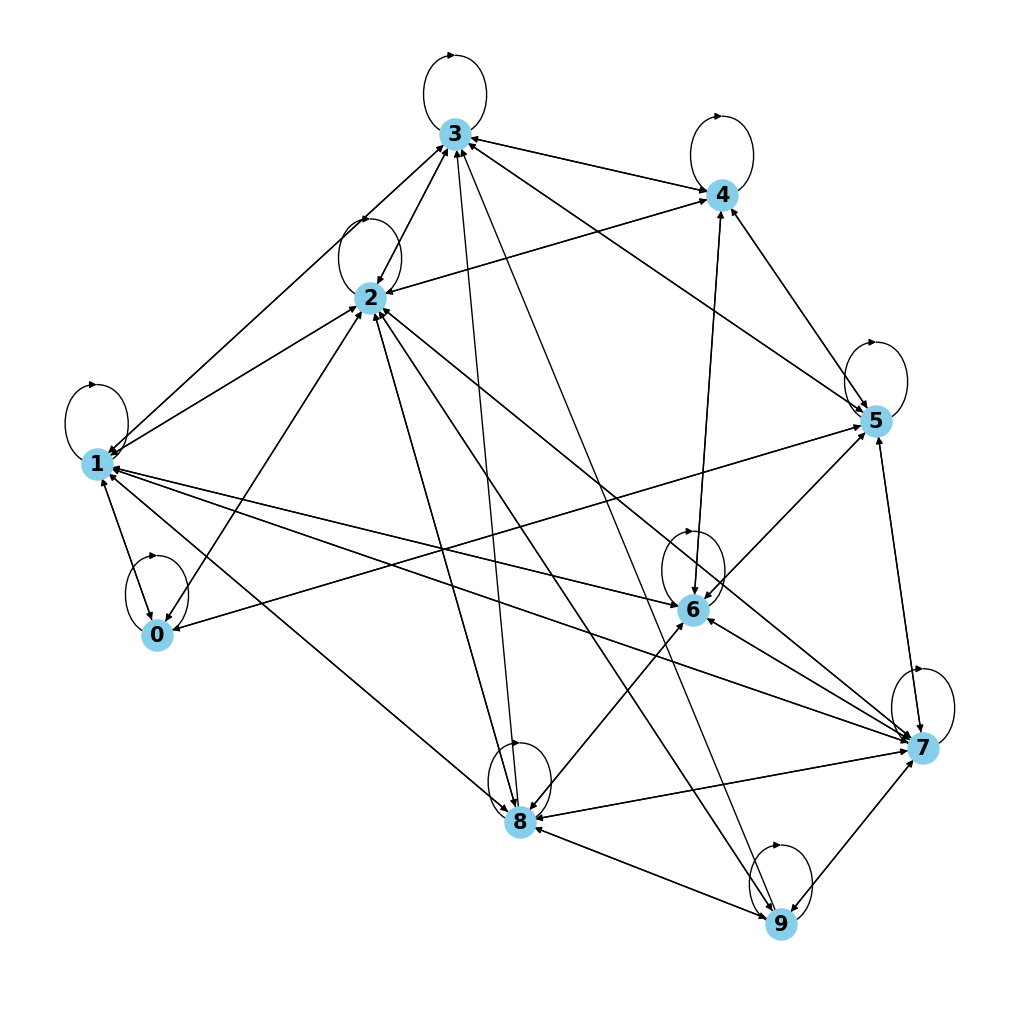

In [47]:
import networkx as nx
import matplotlib.pyplot as plt

def torchdrug_to_digraph(graph):
    g = nx.DiGraph()  # Use DiGraph for directed graph

    # Add nodes
    for i in range(graph.num_residue):
        g.add_node(i)

    # Extract edges
    edge_list = graph.edge_list.tolist()
    
    # Process the edges
    formatted_edges = []
    for edge in edge_list:
        if len(edge) == 2:
            formatted_edges.append((edge[0], edge[1]))
        elif len(edge) == 3:
            # If you know the third value represents a weight, you can use:
            formatted_edges.append((edge[0], edge[1], {'weight': edge[2]}))
            # If it's not a weight or you have more attributes, adjust the dictionary accordingly.

    # Add edges to the graph
    g.add_edges_from(formatted_edges)

    return g

try:
    nx_digraph = torchdrug_to_digraph(protein_[0][:10])

    # Draw the graph using NetworkX and Matplotlib
    plt.figure(figsize=(10, 10))
    pos = nx.spring_layout(nx_digraph)
    nx.draw(nx_digraph, pos, with_labels=True, node_size=500, node_color="skyblue", arrows=True, font_size=15, font_weight='bold')
    plt.show()

except Exception as e:
    print(f"Error: {e}")


In [36]:
protein_[0].edge_list.tolist()[-1]

[81, 54, 0]

In [ ]:
o = gearnet(protein_.cuda(), protein_.residue_feature.float().cuda())

In [14]:
o['node_feature'].shape

torch.Size([350, 4352])

In [66]:
protein = protein_
protein_.residue_feature
with protein.residue():
    protein.residue_feature = protein.residue_feature.to_dense()

In [1]:
import pickle

In [3]:
with open('../data/RAbD/test.pkl', 'rb') as f:
    data = pickle.load(f)

In [14]:
data[0][1]['graph'][:100].edge_list

tensor([], size=(0, 3), dtype=torch.int64)

In [7]:
from torchdrug.data import Protein

[{'N': [[nan, nan, nan],
   [nan, nan, nan],
   [nan, nan, nan],
   [nan, nan, nan],
   [nan, nan, nan],
   [nan, nan, nan],
   [nan, nan, nan],
   [nan, nan, nan],
   [nan, nan, nan],
   [nan, nan, nan],
   [606.197, 698.665, 719.883],
   [603.627, 698.834, 718.382],
   [600.093, 699.216, 717.634],
   [597.577, 697.117, 716.552],
   [594.894, 696.472, 714.188],
   [592.918, 694.602, 715.488],
   [590.85, 692.006, 714.484],
   [588.884, 691.158, 716.355],
   [587.775, 692.358, 719.313],
   [587.458, 692.703, 722.909],
   [584.581, 692.689, 722.97],
   [582.555, 692.473, 720.572],
   [583.342, 693.551, 718.136],
   [585.71, 694.496, 715.506],
   [588.659, 696.26, 716.57],
   [591.206, 698.659, 717.464],
   [593.95, 697.447, 719.053],
   [596.725, 696.939, 721.346],
   [597.665, 694.344, 721.112],
   [597.205, 692.781, 718.938],
   [597.132, 689.727, 717.359],
   [598.833, 688.733, 714.412],
   [599.645, 686.479, 712.921],
   [600.101, 682.909, 713.071],
   [601.721, 679.884, 714.076],
 